In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request
import numpy as np

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random



In [2]:
path = 'exps1and3.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,Model,completed without runtime error,range,all steps attempted,range.1,logic makes sense,range.2,Completed wo hallucination,range.3,answer is logical,range.4,avg % steps completed,range.5
0,gpt-4-turbo-04-22-2024,100.00%,0.00%,16.00%,16.00%,42.00%,4.00%,14.00%,12.00%,18.00%,12.00%,14.00%,12.00%
1,gpt-4-1106-preview,90.00%,4.00%,42.00%,20.00%,56.00%,24.00%,59.08%,9.83%,38.00%,12.00%,44.17%,11.80%
2,gpt-4o-2024-05-13,90.00%,4.00%,94.00%,4.00%,96.00%,8.00%,96.00%,0.00%,74.00%,12.00%,88.40%,2.40%
3,gpt-3.5-turbo-0125,90.00%,12.00%,30.00%,20.00%,44.00%,0.00%,42.00%,60.00%,12.00%,8.00%,20.15%,13.90%
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#remove last row

df = df[:-1]

In [7]:
#remove all '%' from all the columns, and make it numbers, except for the 'model' column
df = df.replace('%', '', regex=True)
df = df.replace(' ', '', regex=True)

In [9]:
#print the columns 
print(df.columns)

Index(['Model', 'completed without runtime error', 'range',
       'all steps attempted', 'range.1', 'logic makes sense', 'range.2',
       'Completed wo hallucination', 'range.3', 'answer is logical ',
       'range.4', 'avg % steps completed', 'range.5'],
      dtype='object')


In [10]:
#convert all columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_14488/4266632569.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [11]:
df.head()

,Model,completed without runtime error,range,all steps attempted,range.1,logic makes sense,range.2,Completed wo hallucination,range.3,answer is logical,range.4,avg % steps completed,range.5
0,gpt-4-turbo-04-22-2024,100.0,0.0,16.0,16.0,42.0,4.0,14.00,12.00,18.0,12.0,14.00,12.0
1,gpt-4-1106-preview,90.0,4.0,42.0,20.0,56.0,24.0,59.08,9.83,38.0,12.0,44.17,11.8
2,gpt-4o-2024-05-13,90.0,4.0,94.0,4.0,96.0,8.0,96.00,0.00,74.0,12.0,88.40,2.4
3,gpt-3.5-turbo-0125,90.0,12.0,30.0,20.0,44.0,0.0,42.00,60.00,12.0,8.0,20.15,13.9


In [ ]:
#make bar plots for all the columns for each model, and take the range of the values into account to make error bars
for col in df.columns:
    if col != 'model':
        sns.barplot(x='Model', y=col, data=df, ci='sd')
        plt.show()


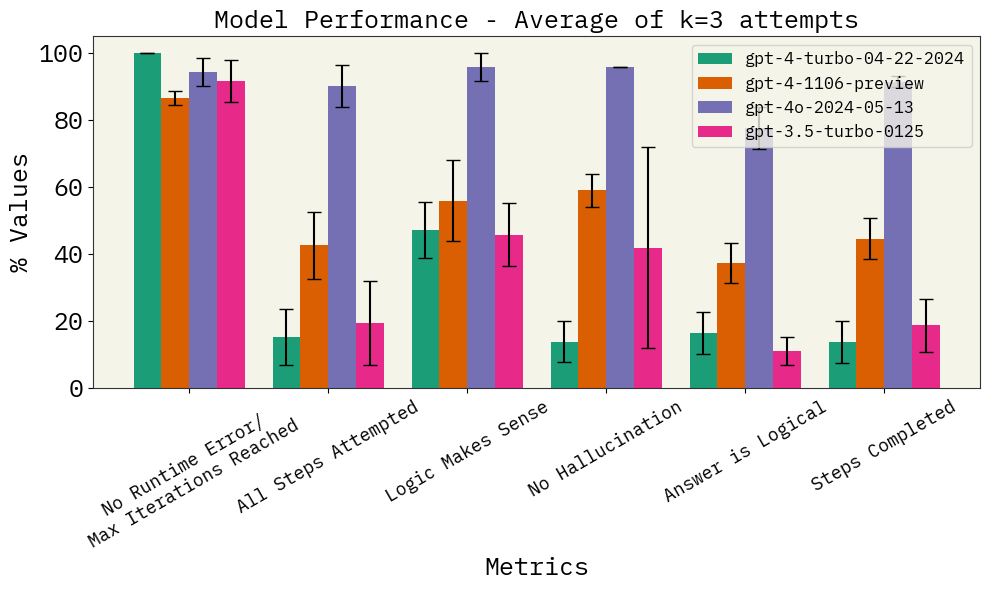

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided by the user
data = {
    "Model": ["gpt-4-turbo-04-22-2024", "gpt-4-1106-preview", "gpt-4o-2024-05-13", "gpt-3.5-turbo-0125"],
    "No Runtime Error/\nMax Iterations Reached": [100.0, 86.67, 94.44, 91.67],
    "range": np.array([0.0, 4.0, 8.33, 12.5])/2,
    "All Steps Attempted": [15.28, 42.67, 90.28, 19.44],
    "range.1": np.array([16.67, 20.0, 12.50, 25.0])/2,
    "Logic Makes Sense": [47.22, 56.0, 95.83, 45.83],
    "range.2": np.array([16.67, 24.0, 8.33, 18.67])/2,
    "No Hallucination": [14.0, 59.08, 96.0, 42.0],
    "range.3": np.array([12.0, 9.83, 0.0, 60.0])/2,
    "Answer is Logical": [16.67, 37.33, 77.78, 11.11],
    "range.4": np.array([12.50, 12.0, 12.50, 8.33])/2,
    "Steps Completed": [13.89, 44.63, 91.44, 18.81],
    "range.5": np.array([12.50, 12.29, 3.19, 15.87])/2
}
    # "No Hallucination": [9.72, 43.84, 80.56, 27.78],
        # "range.3": np.array([20.83, 50.0, 58.33, 62.50.0])/2,


df = pd.DataFrame(data)

# Extracting metrics and errors
metrics = [
   "No Runtime Error/\nMax Iterations Reached",  "All Steps Attempted",  "Logic Makes Sense",
     "No Hallucination",  "Answer is Logical",  "Steps Completed"
]

ranges = ["range", "range.1", "range.2", "range.3", "range.4", "range.5"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = list(range(len(metrics)))

for i, model in enumerate(df["Model"]):
    metric_values = df.loc[i, metrics]
    error_values = df.loc[i, ranges]
    bar_positions_model = [p + bar_width * i for p in bar_positions]
    
    ax.bar(bar_positions_model, metric_values, width=bar_width, yerr=error_values, capsize=5, label=model)
    #make it such that the minimum value is 0
    ax.set_ylim(bottom=0)
    # Add asterisks for zero values
    for j, value in enumerate(metric_values):
        if value == 0.0:
            ax.text(bar_positions_model[j], value, '*', ha='center', va='bottom', color='red', fontsize=12)

# Setting x-axis labels and title
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(metrics, rotation=30, ha="center",size=13)
ax.set_xlabel("Metrics",size=18)
ax.set_ylabel("% Values",size=18)
#increasie y ticks size
ax.tick_params(axis='y', labelsize=18)
#mmove the legend a bit to the left
ax.legend(loc='upper right',fontsize=12)
plt.title('Model Performance - Average of k=3 attempts',size=18)
plt.tight_layout()
plt.show()

In [38]:
path_2 = "/Users/jorgemedina/Desktop/md-agent/notebooks/experiments/results/exp2and3perstepv2.csv"
df = pd.read_csv(path_2)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Model,1,2,3,4,5,6,8,10,Range.1,Range.2,Range.3,Range.4,Range.5,Range.6,Range.8,Range.10
1,gpt-4-turbo-04-22-2024,50.00%,10.00%,16.67%,12.50%,0.00%,0.00%,0.00%,0.00%,0.00%,20.00%,33.33%,25.00%,0.00%,0.00%,0.00%,0.00%
2,gpt-4-1106-preview,50.00%,90.00%,0.00%,65.63%,33.33%,13.89%,0.00%,50.00%,0.00%,20.00%,0.00%,31.25%,26.67%,16.67%,0.00%,100.00%
3,gpt-4o-2024-05-13,50.00%,100.00%,94.44%,100.00%,86.67%,97.22%,87.50%,100.00%,0.00%,0.00%,11.11%,0.00%,13.33%,5.56%,25.00%,0.00%
4,gpt-3.5-turbo-0125,0.00%,25.00%,16.67%,12.50%,43.33%,8.33%,46.88%,30.00%,0.00%,50.00%,33.33%,0.00%,60.00%,16.67%,6.25%,20.00%


In [39]:
#remove all % and convert to numeric
df = df.replace('%', '', regex=True)   
df = df.replace(' ', '', regex=True)
df = df.apply(pd.to_numeric, errors='ignore')

/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_14488/933850059.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [40]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Model,1.0,2.0,3.00,4.00,5.00,6.00,8.00,10.0,Range.1,Range.2,Range.3,Range.4,Range.5,Range.6,Range.8,Range.10
1,gpt-4-turbo-04-22-2024,50.0,10.0,16.67,12.50,0.00,0.00,0.00,0.0,0.00,20.00,33.33,25.00,0.00,0.00,0.00,0.00
2,gpt-4-1106-preview,50.0,90.0,0.00,65.63,33.33,13.89,0.00,50.0,0.00,20.00,0.00,31.25,26.67,16.67,0.00,100.00
3,gpt-4o-2024-05-13,50.0,100.0,94.44,100.00,86.67,97.22,87.50,100.0,0.00,0.00,11.11,0.00,13.33,5.56,25.00,0.00
4,gpt-3.5-turbo-0125,0.0,25.0,16.67,12.50,43.33,8.33,46.88,30.0,0.00,50.00,33.33,0.00,60.00,16.67,6.25,20.00


In [42]:
#make the first row the header
df.columns = df.iloc[0]

In [43]:
df.head()

,Model,1.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,Range.1,Range.2,Range.3,Range.4,Range.5,Range.6,Range.8,Range.10
0,Model,1.0,2.0,3.00,4.00,5.00,6.00,8.00,10.0,Range.1,Range.2,Range.3,Range.4,Range.5,Range.6,Range.8,Range.10
1,gpt-4-turbo-04-22-2024,50.0,10.0,16.67,12.50,0.00,0.00,0.00,0.0,0.00,20.00,33.33,25.00,0.00,0.00,0.00,0.00
2,gpt-4-1106-preview,50.0,90.0,0.00,65.63,33.33,13.89,0.00,50.0,0.00,20.00,0.00,31.25,26.67,16.67,0.00,100.00
3,gpt-4o-2024-05-13,50.0,100.0,94.44,100.00,86.67,97.22,87.50,100.0,0.00,0.00,11.11,0.00,13.33,5.56,25.00,0.00
4,gpt-3.5-turbo-0125,0.0,25.0,16.67,12.50,43.33,8.33,46.88,30.0,0.00,50.00,33.33,0.00,60.00,16.67,6.25,20.00


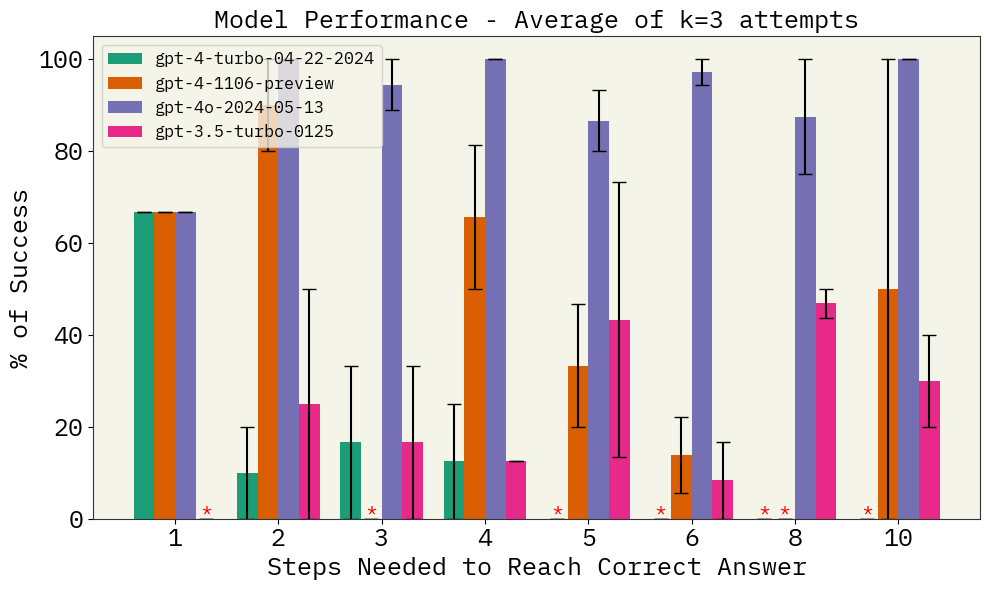

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided by the user
data_new = {
    "Model": ["gpt-4-turbo-04-22-2024", "gpt-4-1106-preview", "gpt-4o-2024-05-13", "gpt-3.5-turbo-0125"],
    "1":     np.array([66.66, 66.66, 66.66, 0.0]),
    "2":     np.array([10.0, 90.0, 100.0, 25.0]),
    "3":     np.array([16.67, 0.0, 94.44, 16.67]),
    "4":     np.array([12.5, 65.63, 100.0, 12.5]),
    "5":     np.array([0.0, 33.33, 86.67, 43.33]),
    "6":     np.array([0.0, 13.89, 97.22, 8.33]),
    "8":     np.array([0.0, 0.0, 87.5, 46.88]),
    "10":    np.array([0.0, 50.0, 100.0, 30.0]),
    "Range.1": np.array([0.0, 0.0, 0.0, 0.0])/2,
    "Range.2": np.array([20.0, 20.0, 0.0, 50.0])/2,
    "Range.3": np.array([33.33, 0.0, 11.11, 33.33])/2,
    "Range.4": np.array([25.0, 31.25, 0.0, 0.0])/2,
    "Range.5": np.array([0.0, 26.67, 13.33, 60.0])/2,
    "Range.6": np.array([0.0, 16.67, 5.56, 16.67])/2,
    "Range.8": np.array([0.0, 0.0, 25.0, 6.25])/2,
    "Range.10":np.array([0.0, 100.0, 0.0, 20.0])/2
}

df_new = pd.DataFrame(data_new)

# Extracting metrics and errors
metrics_new = ["1", "2", "3", "4", "5", "6", "8", "10"]
ranges_new = ["Range.1", "Range.2", "Range.3", "Range.4", "Range.5", "Range.6", "Range.8", "Range.10"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = list(range(len(metrics_new)))

for i, model in enumerate(df_new["Model"]):
    metric_values = df_new.loc[i, metrics_new]
    error_values = df_new.loc[i, ranges_new]
    bar_positions_model = [p + bar_width * i for p in bar_positions]
    
    ax.bar(bar_positions_model, metric_values, width=bar_width, yerr=error_values, capsize=5, label=model)


    # Add asterisks for zero values
    for j, value in enumerate(metric_values):
        if value == 0.0:
            ax.text(bar_positions_model[j], value, '*', ha='center', va='bottom', color='red', fontsize=12)

ax.set_ylim(bottom=0)
# Setting x-axis labels and title
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(metrics_new, rotation=0, ha="center")

ax.legend(loc='upper left',fontsize=12)
ax.set_xlabel("Steps Needed to Reach Correct Answer",size=18)
ax.set_ylabel("% of Success",size=18)
#increasie y ticks size
ax.tick_params(axis='x', labelsize=18)
plt.title('Model Performance - Average of k=3 attempts',size=18)
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.show()


0          gpt-3.5-turbo
1     gpt-4-1106-preview
2            gpt-4-turbo
3      gpt-4o-2024-08-06
4          Claude 3 Opus
5      Claude 3.5 Sonnet
6          Llama 3.1 70B
7    Llama 3.1 405B, fp8
Name: Model, dtype: object


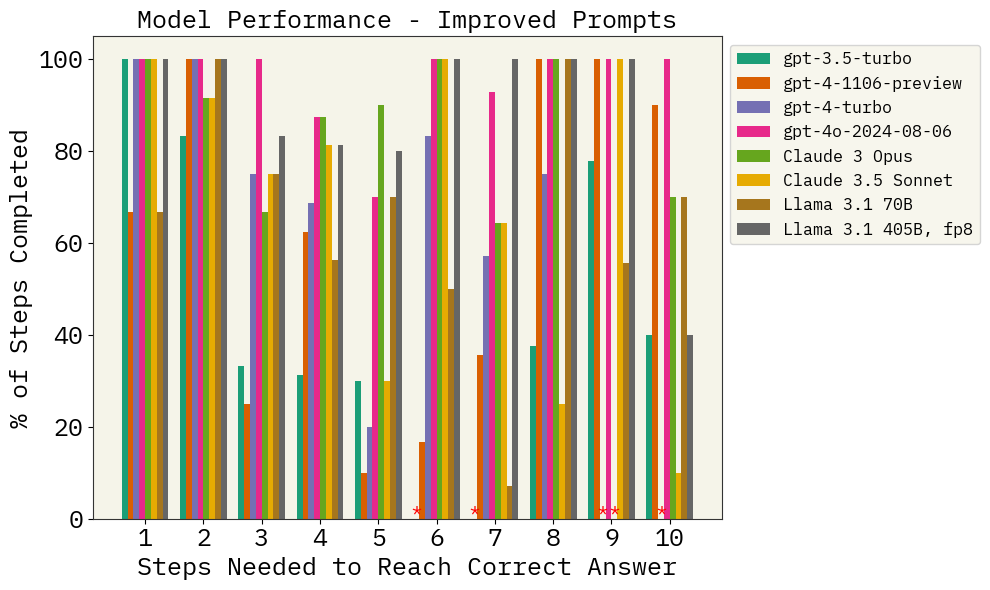

In [38]:

data_new = {
    "Model": ["gpt-4-turbo-04-22-2024", "gpt-4-1106-preview", "gpt-4o-2024-05-13", "gpt-3.5-turbo-0125"],
    "1":     np.array([100.00, 66.67, 100.00, 100.00]),
    "2":     np.array([100.00, 100.00, 100.00, 83.33]),
    "3":     np.array([75.00, 25.00, 100.00, 33.33]),
    "4":     np.array([68.75, 62.50, 87.50, 31.25]),
    "5":     np.array([20.00, 10.00, 70.00, 30.00]),
    "6":     np.array([83.33, 16.67, 100.00, 0.00]),
    "7":     np.array([57.14, 35.71, 92.86, 0.00]),
    "8":     np.array([75.00, 100.00, 100.00, 37.50]),
    "9":     np.array([0.00, 100.00, 100.00, 77.78]),
    "10":    np.array([0.00, 90.00, 100.00, 40.00])
}

updated_data = {
    "Model": [
        "gpt-3.5-turbo", "gpt-4-1106-preview", "gpt-4-turbo", "gpt-4o-2024-08-06", 
        "Claude 3 Opus", "Claude 3.5 Sonnet", "Llama 3.1 70B", "Llama 3.1 405B, fp8"
    ],
    "1": np.array([100.00, 66.67, 100.00, 100.00, 100.00, 100.00, 66.67, 100.00]),
    "2": np.array([83.33, 100.00, 100.00, 100.00, 91.67, 91.67, 100.00, 100.00]),
    "3": np.array([33.33, 25.00, 75.00, 100.00, 66.67, 75.00, 75.00, 83.33]),
    "4": np.array([31.25, 62.50, 68.75, 87.50, 87.50, 81.25, 56.25, 81.25]),
    "5": np.array([30.00, 10.00, 20.00, 70.00, 90.00, 30.00, 70.00, 80.00]),
    "6": np.array([0.00, 16.67, 83.33, 100.00, 100.00, 100.00, 50.00, 100.00]),
    "7": np.array([0.00, 35.71, 57.14, 92.86, 64.29, 64.29, 7.14, 100.00]),
    "8": np.array([37.50, 100.00, 75.00, 100.00, 100.00, 25.00, 100.00, 100.00]),
    "9": np.array([77.78, 100.00, 0.00, 100.00, 0.00, 100.00, 55.56, 100.00]),
    "10": np.array([40.00, 90.00, 0.00, 100.00, 70.00, 10.00, 70.00, 40.00])
}

df_new = pd.DataFrame(updated_data)
metrics_new = ["1", "2", "3", "4", "5", "6","7" ,"8","9", "10"]
# ranges_new = ["Range.1", "Range.2", "Range.3", "Range.4", "Range.5", "Range.6", "Range.8", "Range.10"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
bar_positions = list(range(len(metrics_new)))
print(df_new["Model"])
for i, model in enumerate(df_new["Model"]):
    metric_values = df_new.loc[i, metrics_new]
    # error_values = df_new.loc[i, ranges_new]
    bar_positions_model = [p + bar_width * i for p in bar_positions]
    
    ax.bar(bar_positions_model, metric_values, width=bar_width, capsize=5, label=model)


    # Add asterisks for zero values
    for j, value in enumerate(metric_values):
        if value == 0.0:
            ax.text(bar_positions_model[j], value, '*', ha='center', va='bottom', color='red', fontsize=12)

ax.set_ylim(bottom=0)
# Setting x-axis labels and title
ax.set_xticks([p + bar_width * 3.5 for p in bar_positions])
ax.set_xticklabels(metrics_new, rotation=0, ha="center")

# ax.legend(loc='upper left',fontsize=12)
#put the legend outside the plot
ax.legend(loc='upper left',fontsize=12, bbox_to_anchor=(1, 1))
ax.set_xlabel("Steps Needed to Reach Correct Answer",size=18)
ax.set_ylabel("% of Steps Completed",size=18)
#increasie y ticks size
ax.tick_params(axis='x', labelsize=18)
plt.title('Model Performance - Improved Prompts',size=18)
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.show()

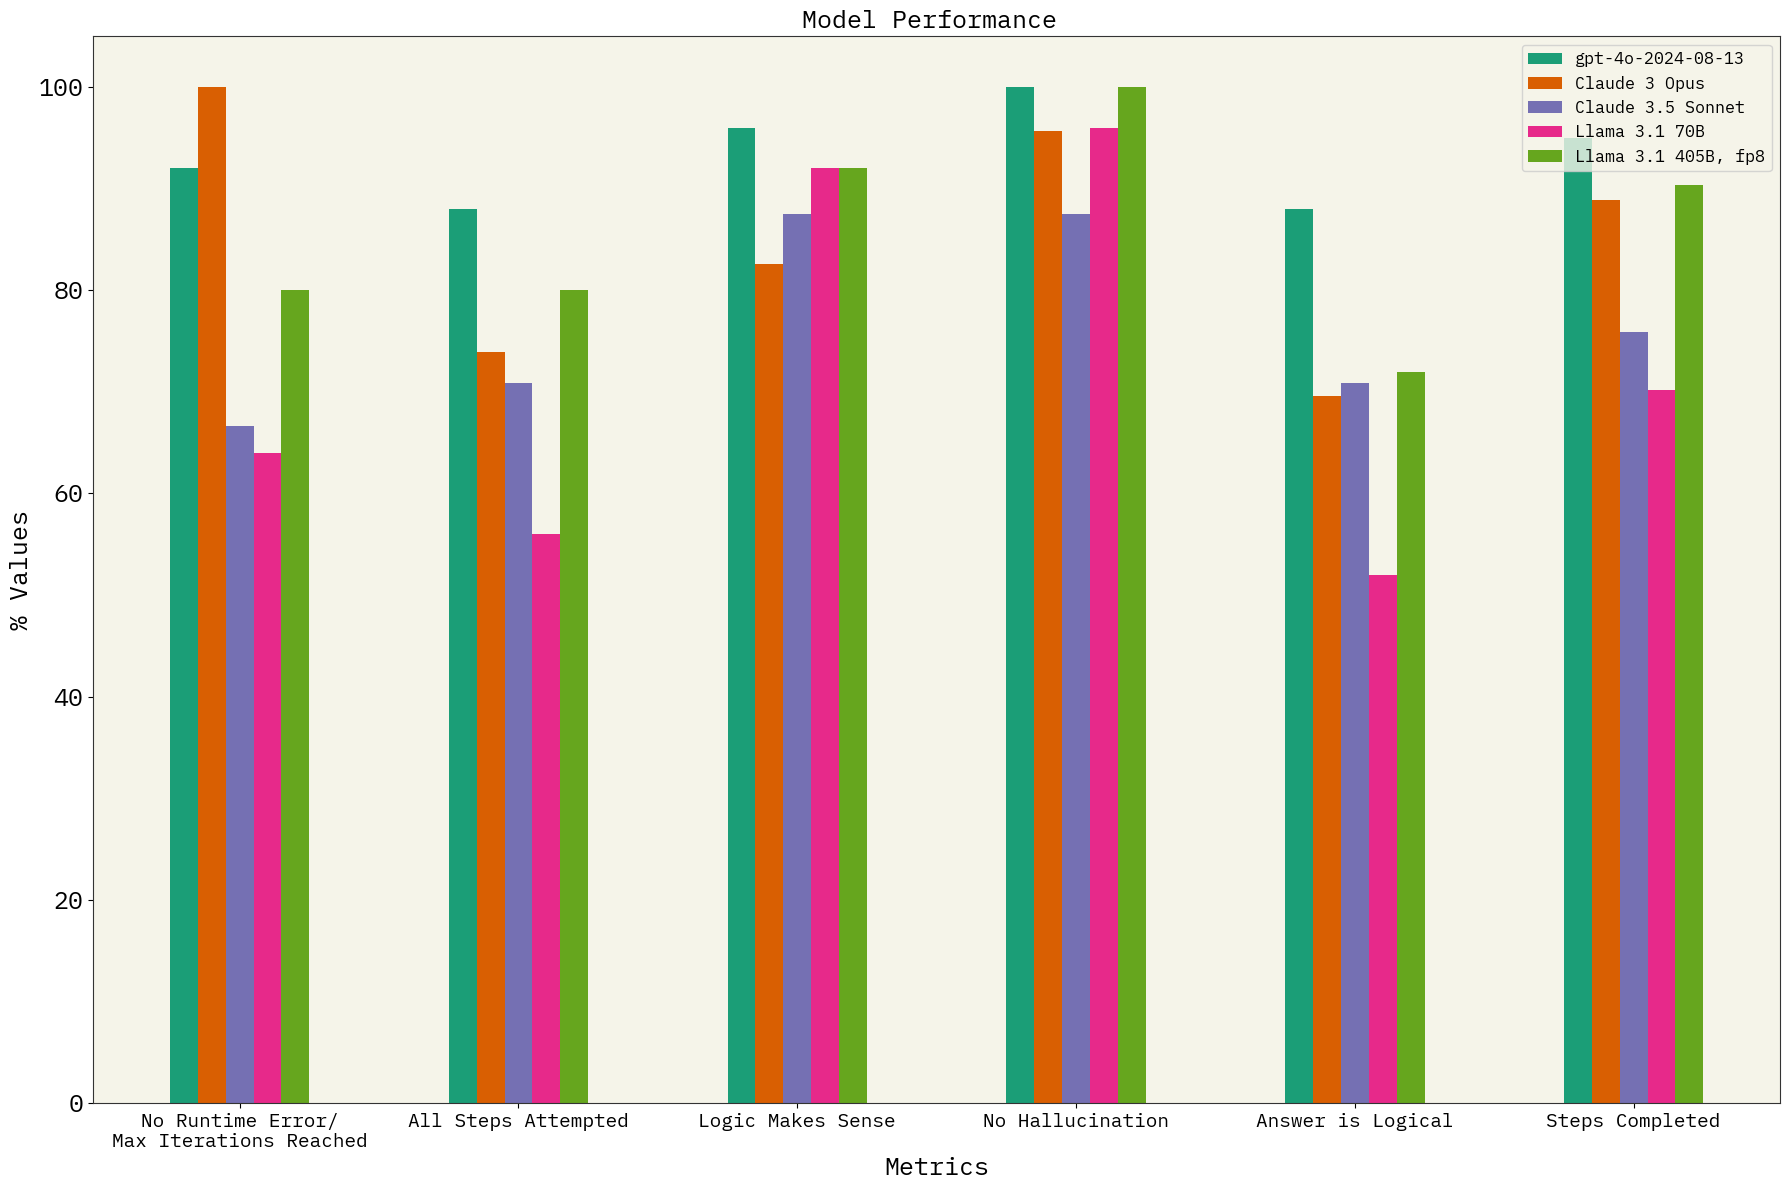

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
"""Model,completed without runtime error,all steps attempted,completed wo hallucination,logic makes sense,answer is logical 
gpt-4-turbo-04-22-2024,100.00%,25.00%,20.83%,58.33%,25.00%
gpt-4-1106-preview,100.00%,54.17%,70.83%,75.00%,45.83%
gpt-4o-2024-05-13,95.83%,95.83%,100.00%,100.00%,83.33%
gpt-3.5-turbo-0125,100.00%,41.67%,75.00%,62.50%,25.00%"""
# Data provided by the user
data = {
    "Model": ["gpt-4-turbo-04-22-2024", "gpt-4-1106-preview", "gpt-4o-2024-08-13", "gpt-3.5-turbo-0125"],
    "No Runtime Error/\nMax Iterations Reached": [100.0,  95.9, 95.9, 100.0],
    "All Steps Attempted": [25.0, 54.17, 95.83, 41.67],
    "No Hallucination": [20.83, 70.83, 100.0, 70.83],
    "Logic Makes Sense": [58.33, 75.0, 100.0, 58.33],
    "Answer is Logical": [25.0, 45.83, 83.33, 25.0],
    "Steps Completed": [20.83, 52.15, 93.33, 13.75],
}
updated_data = {
    "Model": ["gpt-4-turbo-04-22-2024", "gpt-4-1106-preview", "gpt-4o-2024-08-06", "gpt-3.5-turbo-0125"],
    "No Runtime Error/\nMax Iterations Reached": [91.67, 84.00, 92.00, 91.67],
    "All Steps Attempted": [56.00, 60.00, 88.00, 33.33],
    "No Hallucination": [88.00, 80.00, 100.00, 66.67],
    "Logic Makes Sense": [68.00, 60.00, 96.00, 54.17],
    "Answer is Logical": [56.00, 48.00, 88.00, 29.17],
    "Steps Completed": [71.50, 61.92, 95.03, 53.07],

}

extended_data = {
    "Model": [
        "gpt-4o-2024-08-13", 
        "Claude 3 Opus", 
        "Claude 3.5 Sonnet", 
        "Llama 3.1 70B", 
        "Llama 3.1 405B, fp8"
    ],
    "No Runtime Error/\nMax Iterations Reached": [ 92.00,100.00, 66.67, 64.00, 80.00],
    "All Steps Attempted": [88.00, 73.91, 70.83, 56.00, 80.00],
    "No Hallucination": [ 100.00,  95.65, 87.50, 96.00, 100.00],
    "Logic Makes Sense": [ 96.00,  82.61, 87.50, 92.00, 92.00],
    "Answer is Logical": [88.00, 69.57, 70.83, 52.00, 72.00],
    "Steps Completed": [95.03, 88.92,75.94,70.19,90.33],
}
df = pd.DataFrame(extended_data)

# Extracting metrics and errors
metrics = [
   "No Runtime Error/\nMax Iterations Reached",  "All Steps Attempted",  "Logic Makes Sense",
     "No Hallucination",  "Answer is Logical",  "Steps Completed"
]


# Plotting
fig, ax = plt.subplots(figsize=(18, 12))

bar_width = 0.1
bar_positions = list(range(len(metrics)))

for i, model in enumerate(df["Model"]):
    metric_values = df.loc[i, metrics]
    # error_values = df.loc[i, ranges]
    bar_positions_model = [p + bar_width * i for p in bar_positions]
    
    ax.bar(bar_positions_model, metric_values, width=bar_width, capsize=5, label=model)
    #make it such that the minimum value is 0
    ax.set_ylim(bottom=0)
    # Add asterisks for zero values
    for j, value in enumerate(metric_values):
        if value == 0.0:
            ax.text(bar_positions_model[j], value, '*', ha='center', va='bottom', color='red', fontsize=12)

# Setting x-axis labels and title
ax.set_xticks([p + bar_width * 2 for p in bar_positions])
ax.set_xticklabels(metrics, ha="center",size=14)
ax.set_xlabel("Metrics",size=18)
ax.set_ylabel("% Values",size=18)
ax.set_ylim(bottom=0, top=105)
#increasie y ticks size
ax.tick_params(axis='y', labelsize=18)
#mmove the legend a bit to the left
ax.legend(loc='upper right',fontsize=12)
plt.title('Model Performance ',size=18)
plt.tight_layout()
plt.show()

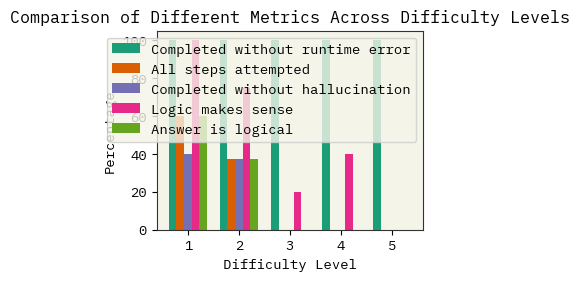

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
difficulties = ['1', '2', '3', '4', '5']
metrics = [
    'Completed without runtime error',
    'All steps attempted',
    'Completed without hallucination',
    'Logic makes sense',
    'Answer is logical'
]

# Percentage data for each difficulty and metric
percentages = [
    [100.00, 60.00, 40.00, 100.00, 60.00],
    [100.00, 37.50, 37.50, 75.00, 37.50],
    [100.00, 0.00, 0.00, 20.00, 0.00],
    [100.00, 0.00, 0.00, 40.00, 0.00],
    [100.00, 0.00, 0.00, 0.00, 0.00]
]

# Convert the list to a numpy array for easier handling
percentages = np.array(percentages)

# Plotting
fig, ax = plt.subplots()

# Define bar width and positions
bar_width = 0.15
index = np.arange(len(difficulties))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, percentages[:, i], bar_width, label=metric)

# Add labels and title
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Different Metrics Across Difficulty Levels')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(difficulties)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


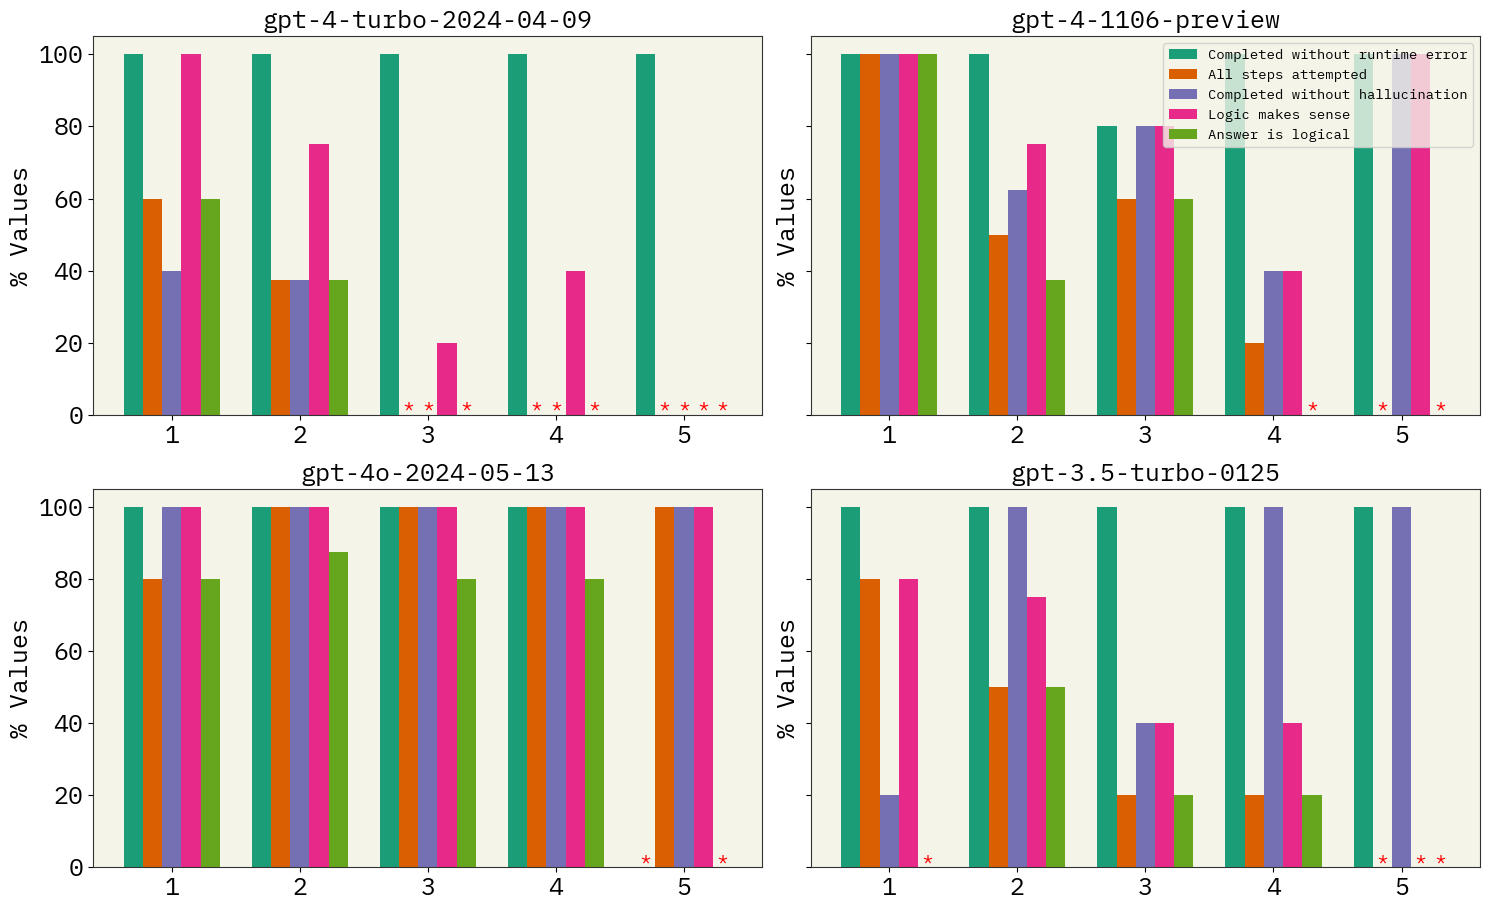

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
difficulties = ['1', '2', '3', '4', '5']
metrics = [
    'Completed without runtime error',
    'All steps attempted',
    'Completed without hallucination',
    'Logic makes sense',
    'Answer is logical'
]

# Percentage data for each difficulty and metric for each model
percentages_model_1 = [
    [100.00, 60.00, 40.00, 100.00, 60.00],
    [100.00, 37.50, 37.50, 75.00, 37.50],
    [100.00, 0.00, 0.00, 20.00, 0.00],
    [100.00, 0.00, 0.00, 40.00, 0.00],
    [100.00, 0.00, 0.00, 0.00, 0.00]
]

percentages_model_2 = [
    [100.00, 100.00, 100.00, 100.00, 100.00],
    [100.00, 50.00, 62.50, 75.00, 37.50],
    [80.00, 60.00, 80.00, 80.00, 60.00],
    [100.00, 20.00, 40.00, 40.00, 0.00],
    [100.00, 0.00, 100.00, 100.00, 0.00]
]

percentages_model_3 = [
    [100.00, 80.00, 100.00, 100.00, 80.00],
    [100.00, 100.00, 100.00, 100.00, 87.50],
    [100.00, 100.00, 100.00, 100.00, 80.00],
    [100.00, 100.00, 100.00, 100.00, 80.00],
    [0.00, 100.00, 100.00, 100.00, 0.00]
]

percentages_model_4 = [
    [100.00, 80.00, 20.00, 80.00, 0.00],
    [100.00, 50.00, 100.00, 75.00, 50.00],
    [100.00, 20.00, 40.00, 40.00, 20.00],
    [100.00, 20.00, 100.00, 40.00, 20.00],
    [100.00, 0.00, 100.00, 0.00, 0.00]
]

# Convert the l

# Convert the lists to numpy arrays for easier handling
percentages_model_1 = np.array(percentages_model_1)
percentages_model_2 = np.array(percentages_model_2)
percentages_model_3 = np.array(percentages_model_3)
percentages_model_4 = np.array(percentages_model_4)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
# fig.suptitle('Comparison of Different Metrics Across Difficulty Levels for Four Models')

models = [
    (percentages_model_1, "gpt-4-turbo-2024-04-09"),
    (percentages_model_2, "gpt-4-1106-preview"),
    (percentages_model_3, "gpt-4o-2024-05-13"),
    (percentages_model_4, "gpt-3.5-turbo-0125")
]

bar_width = 0.15
count = 0
for ax, (percentages, title) in zip(axs.flat, models):
    index = np.arange(len(difficulties))
    for i, metric in enumerate(metrics):
        bars = ax.bar(index + i * bar_width, percentages[:, i], bar_width, label=metric)
        for bar, value in zip(bars, percentages[:, i]):
            if value == 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, '*',  ha='center', va='bottom', color='red', fontsize=12)
    
    ax.set_title(title,fontsize=18)
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(difficulties, fontsize=18)
    ax.set_ylabel("% Values",size=18)
    #increasie y ticks size
    ax.tick_params(axis='y', labelsize=18)
    if count == 1:
        ax.legend()
    count += 1
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_14488/1173891760.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0', '20', '40', '60', '80', '100'],size=18)


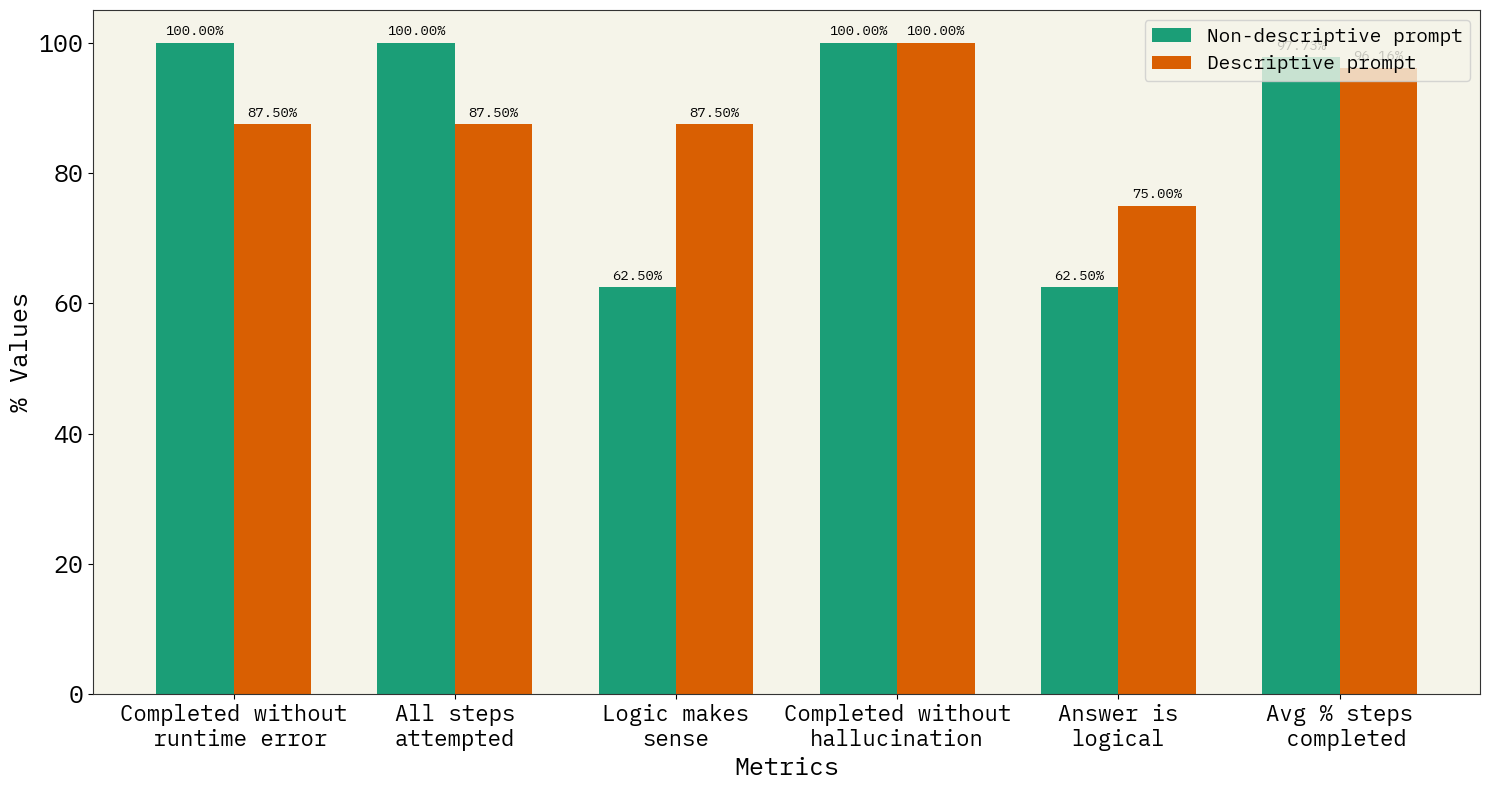

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
labels = ['Non-descriptive prompt', 'Descriptive prompt']
metrics = [
    'Completed without\n runtime error',
    'All steps\nattempted',
    'Logic makes\nsense',
    'Completed without\nhallucination',
    'Answer is\nlogical',
    'Avg % steps\n completed'
]

# Percentage data for non-descriptive and descriptive prompts
data = [
    [100.00, 100.00,62.50, 100.00, 62.50, 97.73],
    [87.50, 87.50, 87.50,100.00, 75.00, 96.16]
]

# Convert the list to a numpy array for easier handling
data = np.array(data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.35
index = np.arange(len(metrics))

bars1 = ax.bar(index, data[0], bar_width, label='Non-descriptive prompt')
bars2 = ax.bar(index + bar_width, data[1], bar_width, label='Descriptive prompt')

# Adding labels, title, and legend
ax.set_xlabel('Metrics',size=18)
ax.set_ylabel('% Values',size=18)
ax.set_yticklabels(['0', '20', '40', '60', '80', '100'],size=18)
# ax.set_title('Comparison of Non-descriptive and Descriptive Prompts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics, rotation=0, ha='center',size=16)
ax.legend(fontsize=14)

# Adding percentage labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
